In [114]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression


In [115]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
DATA = automobile.data.features 

FEATURES_OF_INTEREST = ["wheel-base", "length", "width", "height", "curb-weight", "engine-size",
"bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]
TARGET = "price"

# Data Preparation and Exploration

## a)

In [145]:
# keep features of interest
X=DATA[FEATURES_OF_INTEREST]
Y=DATA[TARGET]

# remove rows with unknown values (for X and Y)
initialRows = X.shape[0]
X = X.dropna()
Y = Y.dropna()
nonNullIndices = Y.index.intersection(X.index)
X = X.loc[nonNullIndices]
Y = Y.loc[nonNullIndices]
finalRows = X.shape[0]
rowsDeleted = initialRows-finalRows
print("Rows deleted:",rowsDeleted)
print("Remaining Observations:",X.shape[0])

Rows deleted: 10
Remaining Observations: 195


## b)

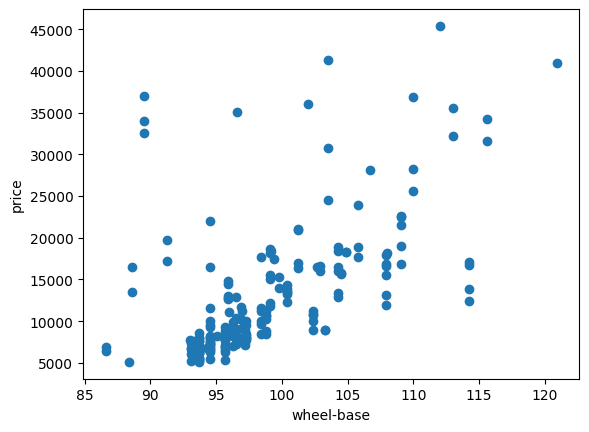

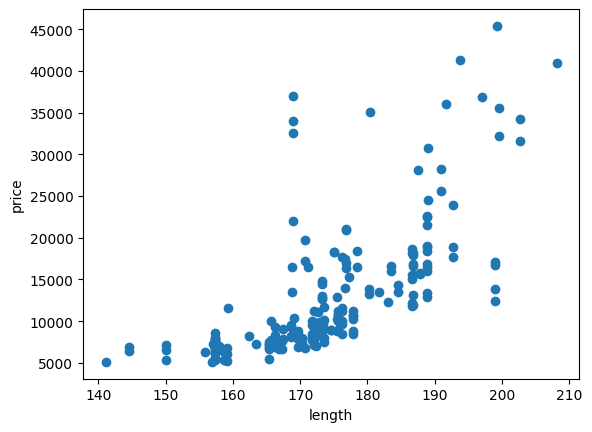

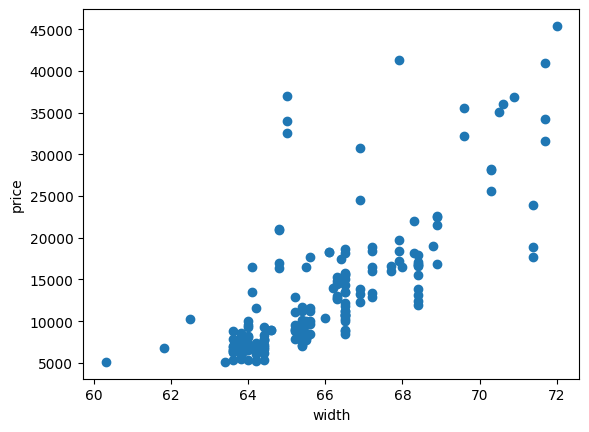

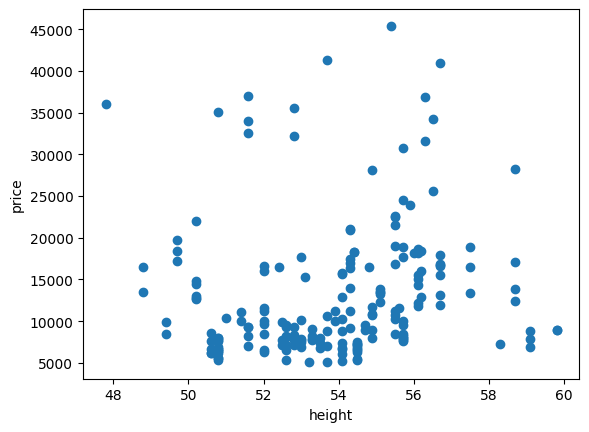

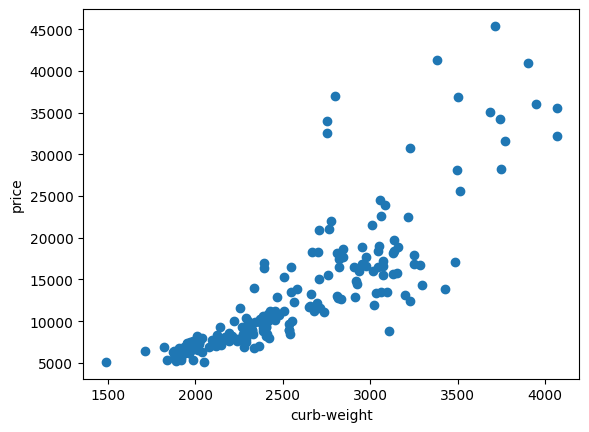

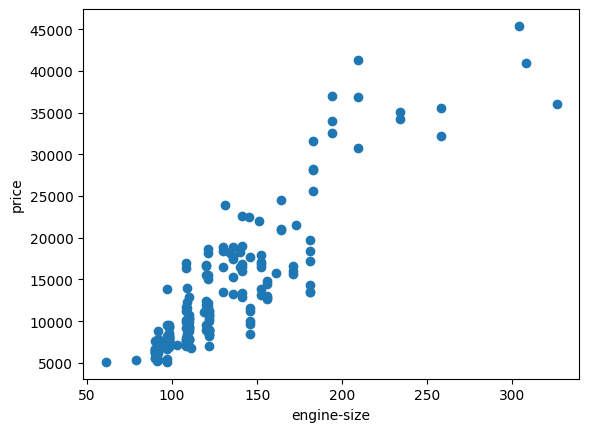

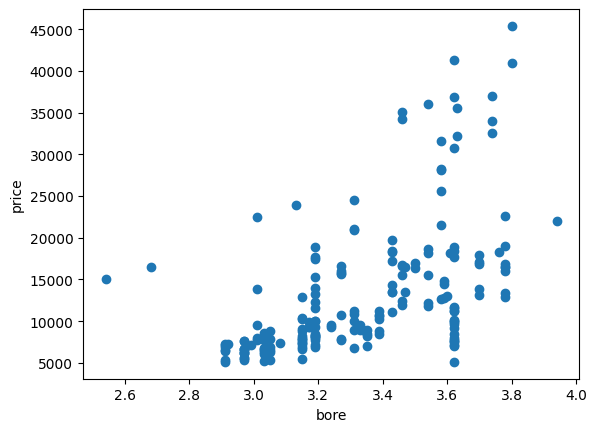

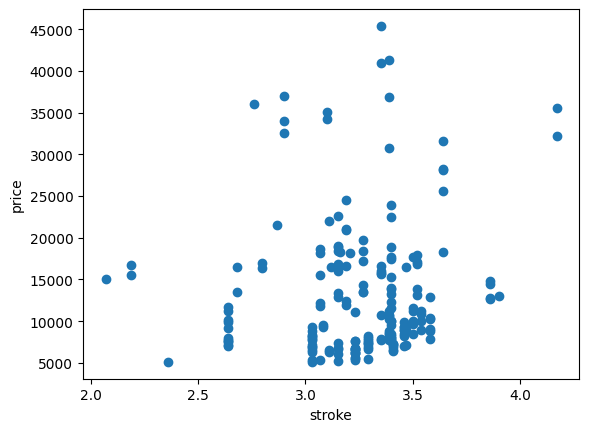

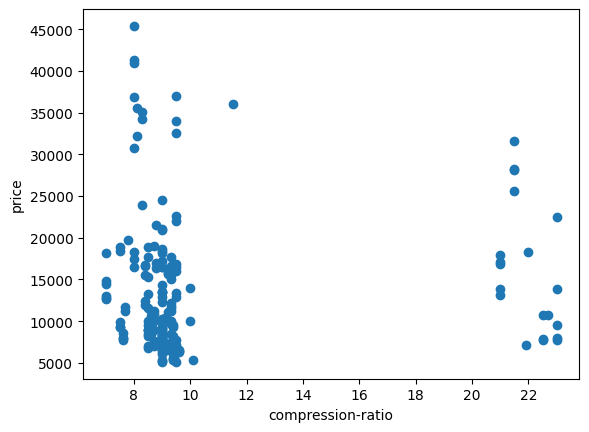

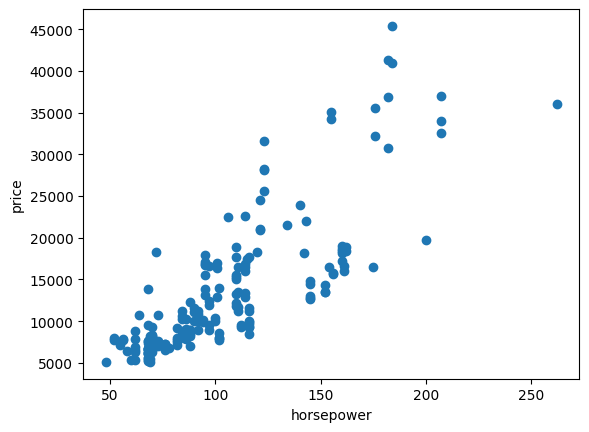

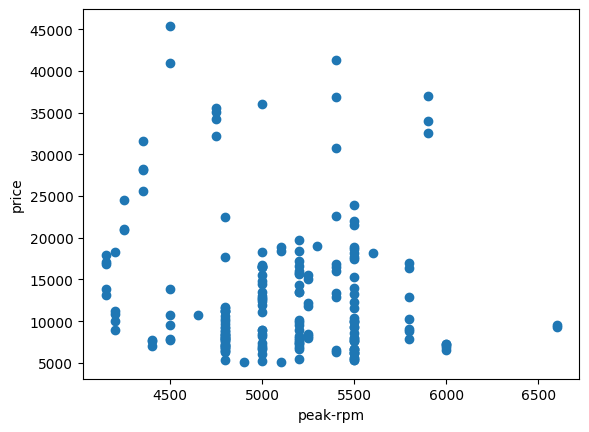

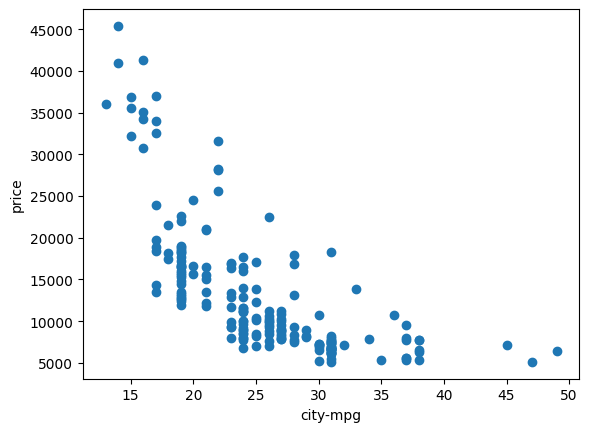

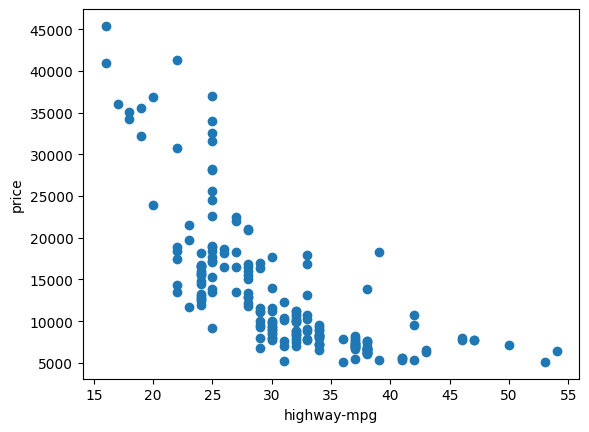

In [98]:
def plotvar(features, targets, featureName):
    fig, ax = plt.subplots()
    ax.scatter(features,targets, label=featureName)
    ax.set_xlabel(featureName)
    ax.set_ylabel(TARGET)
    # ax.legend()
    plt.show()
for feature in FEATURES_OF_INTEREST:
    plotvar(X[feature], Y, feature)

## c) 

### wheel-base vs price
There doesn't appear to be a strong correlation between wheel-base and price. If anything there's a weak linear correlation. I do not think wheel-base would be a good predictor of price.

### length vs price
It looks like there is a quadratic or exponential relationship between length and price. I think length would be a good predictor of price.

### width vs price
Similar to length, it looks like there is a quadratic or exponential relationship between width and price. I think width would be a good predictor of price.

### height vs price
There doesn't appear to be any correlation between height and price. I do not think height would be a good predictor of price.

### curb-weight vs price
It looks like there is a quadratic or exponential relationship between curb-weight and price. I think curb-weight would be a good predictor of price.

### engine-size vs price
It looks like there is a linear relationship between engine-size and price. I think engine-size would be a good predictor of price.

### bore vs price
It looks like there is a linear relationship between bore and price. I think bore would be a good predictor of price.

### stroke vs price
There doesn't appear to be any correlation between stroke and price. I do not think stroke would be a good predictor of price.

### compression-ratio vs price
There doesn't appear to be any correlation between compression-ratio and price. I do not think compression-ratio would be a good predictor of price.

### horsepower vs price
It looks like there is a linear relationship between horsepower and price. I think horsepower would be a good predictor of price.

### peak-rpm vs price
There doesn't appear to be any correlation between peak-rpm and price. I do not think peak-rpm would be a good predictor of price.

### city-mpg vs price
It looks like there is a inverse (1/city-mpg) relationship between city-mpg and price. I think city-mpg would be a good predictor of price.


### highway-mpg vs price
It looks like there is a inverse (1/highway-mpg) relationship between highway-mpg and price. I think highway-mpg would be a good predictor of price.


## d)

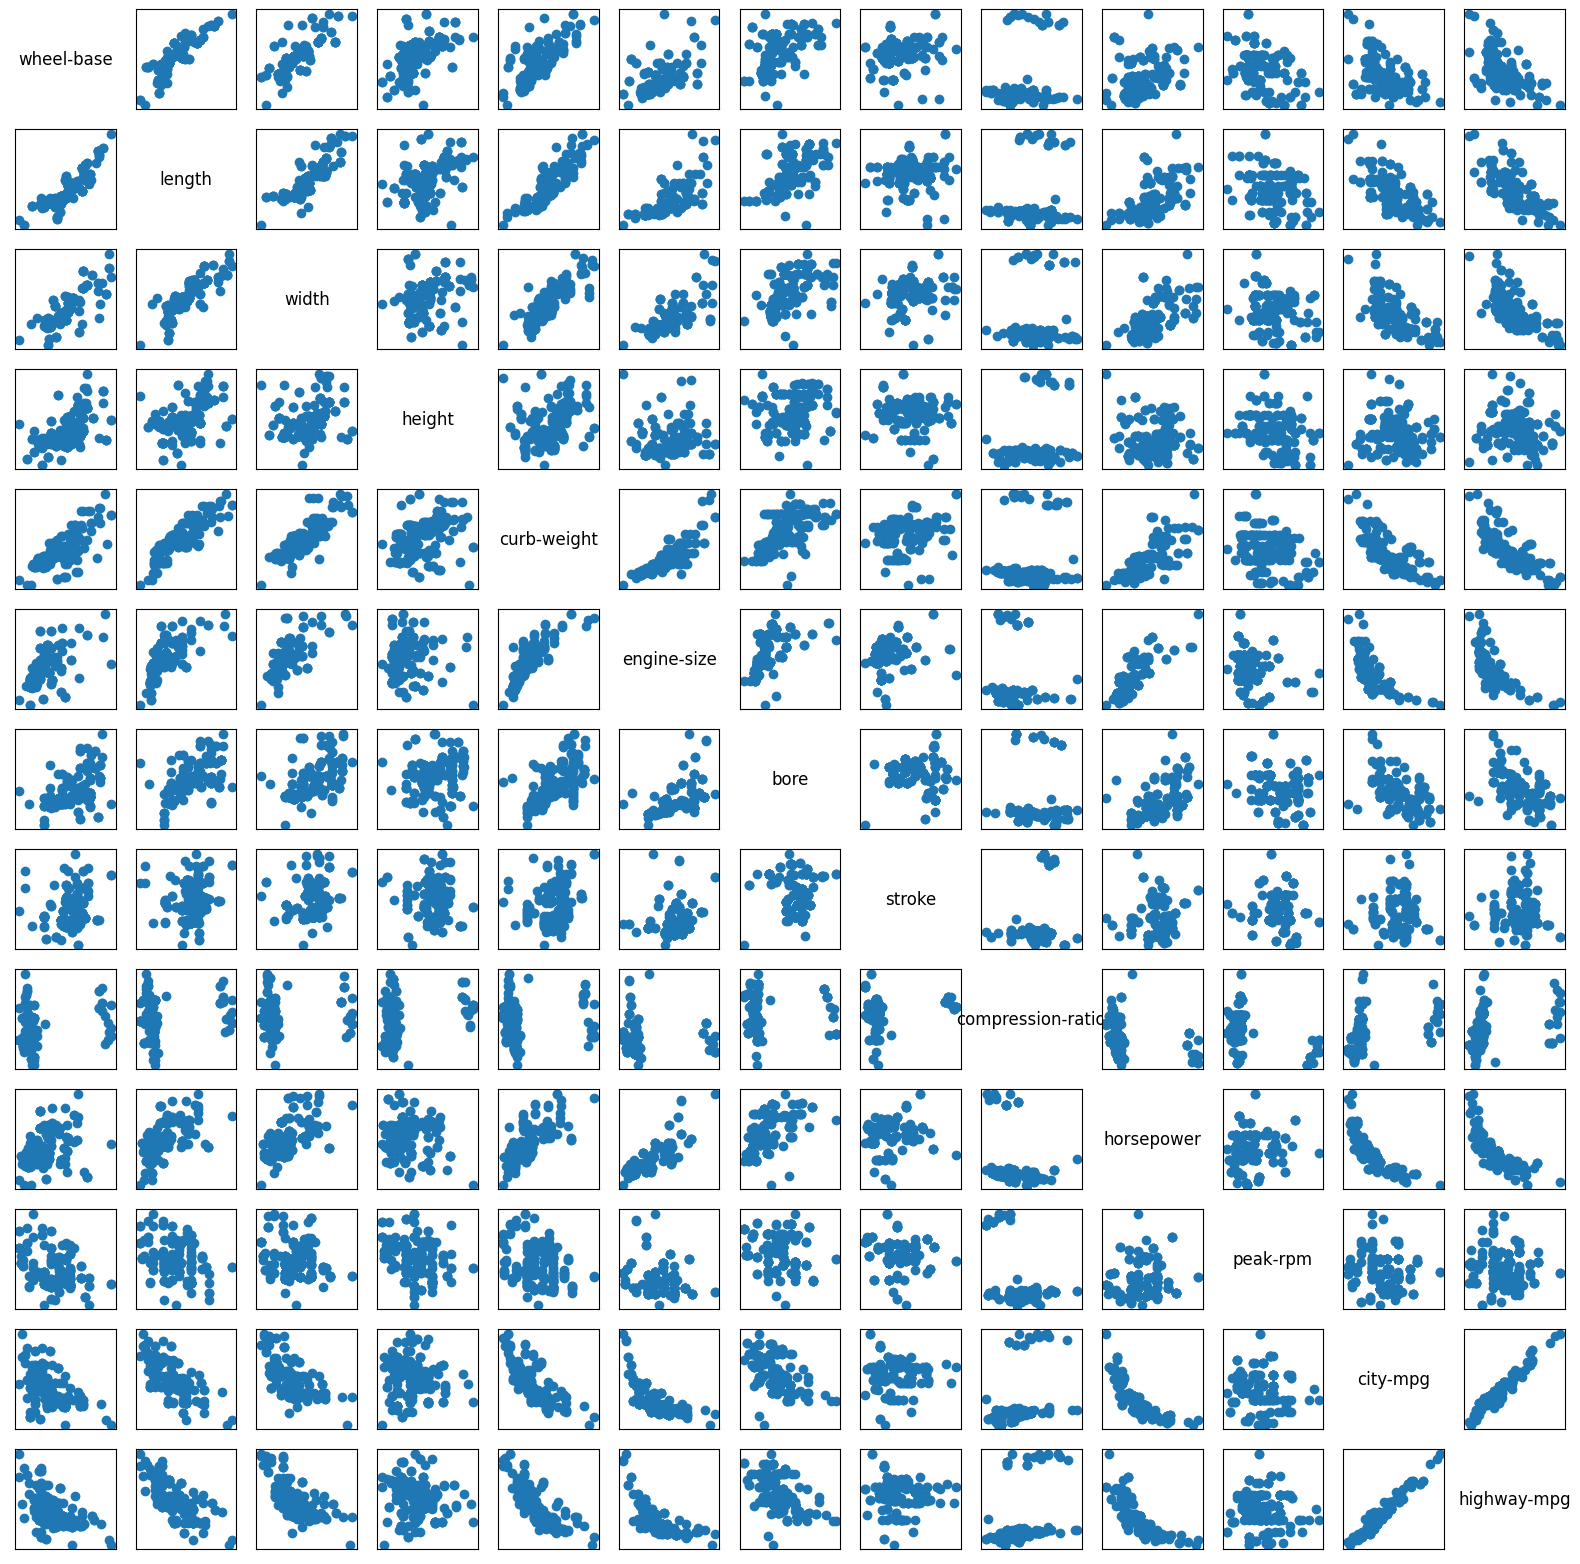

In [113]:
def subplotvar(subplot, feature1, feature2):
    x = X[feature1]
    y = X[feature2]
    subplot.scatter(x,y)
    subplot.set_xticks([])
    subplot.set_yticks([])

fig, ax = plt.subplots(len(FEATURES_OF_INTEREST),len(FEATURES_OF_INTEREST), figsize=(20,20))

for i in range(len(FEATURES_OF_INTEREST)):

    feature1 = FEATURES_OF_INTEREST[i]

    for j in range(len(FEATURES_OF_INTEREST)):
        if i==j:
            ax[i][i].text(0.5, 0.5, feature1, fontsize=12, ha='center', va='center')
            ax[i][i].axis('off')
            continue
        
        feature2 = FEATURES_OF_INTEREST[j]        

        subplotvar(ax[i][j], feature1, feature2)

plt.show()


## e) 

From the pairwise scatterplots we see that there is a strong correlation between the following variables:
- wheel-base (6) & length, width, curb-weight, engine-size, city-mpg, highway-mpg
- length (6) & wheel-base, width, curb-weight, engine-size, city-mpg, highway-mpg
- width (6) & length, wheel-base, curb-weight, engine-size, city-mpg, highway-mpg
- height (0)
- curb-weight (7) & wheel-base, length, width, engine-size, horsepower, city-mpg, highway-mpg
- engine-size (7) & wheel-base, length, width, curb-weight, horsepower, city-mpg, highway-mpg
- bore (2) & city-mpg, highway-mpg
- stroke (0)
- compression-ratio (0)
- horsepower (4) & curb-weight, engine-size, city-mpg, highway-mpg
- peak-rpm (0)
- city-mpg (8) & wheel-base, length, width, curb-weight, engine-size, bore, horsepower, highway-mpg
- highway-mpg (8) & wheel-base, length, width, curb-weight, engine-size, bore, horsepower, city-mpg

Since we don't want to keep variables that are correlated and we want to minimize the number of variables for compuational costs, I will use a greedy algorithm to select variables that have the most correlations and then remove the variables that are correlated to my selections.
 
- height (0)
- stroke (0)
- compression-ratio (0)
- peak-rpm (3) & wheel-base, length, width
- city-mpg (8) & wheel-base, length, width, curb-weight, engine-size, bore, horsepower, highway-mpg



# Unregularized Regression

## a) 

Model 1) $price = 1/cityMpg + peakRpm + height$
- After excluding variables for being collinear, there were 5 variables to choose from: height, stroke, compression-ratio, peak-rpm, and city-mpg. When these 5 features were visualized, the only feature that had a visible relationship was city-mpg. I noticed that city-mpg and price had a relationship similar to $price=1/cityMpg$. I also noticed that compression-ratio had little to no correlation with price so I pruned that from my prospective features. Now with 3 variables remaining, I chose 2 peak-rpm and stroke arbitrarily. From the data visualization, peak-rpm and stroke don't seem to have any linear relationship so I just added them to the model without any transformations. 

Model 2) $price = 1/cityMpg + peakRpm + compressionRatio$
- Copying the same rationale for including 1/cityMpg in model 1, this time I decided to keep compression-ratio even though it had little to no correlation with price. Now with 3 variables remaining, I chose peak-rpm since it was also used in model 1. From the data visualization, peak-rpm don't seem to have any linear relationship so I just added it to the model without any transformations. 

Model 3) $price = 1/cityMpg + curbWeight^2 + stroke$
- From the data visualization I noticed that the relation between curb-weight and price seemed exponential. Even though curbWeight and cityMpg are collinear, I wanted to see the effects of having both features in the model. I chose peak-rpm since it was also used in models 1 and 2 


In [146]:
def visualizeModel(model, features):
    print(f"R2: {model.score(features,Y)}")
    print(f"coefs: {list(zip(model.coef_, features))}\nintercept: {model.intercept_}")
    prediction = model.predict(features)
    fig, ax = plt.subplots()
    ax.scatter(x=Y,y=prediction)
    ax.plot(Y,Y,color="orange")
    ax.set_xlabel("True Target")
    ax.set_ylabel("Predicted Target")
    plt.show()

## b) Model 1

R2: 0.521396949334338
coefs: [(-895.1941523188989, 'city-mpg'), (-2.570356317642478, 'peak-rpm'), (1638.4114928996105, 'stroke')]
intercept: 43745.15076729687


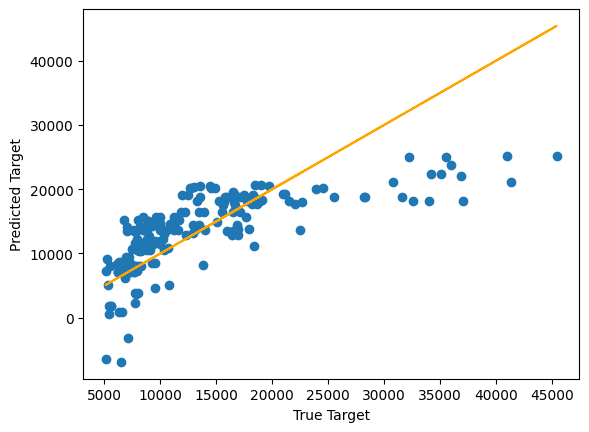

In [147]:
# model 1
m1_features = X[["city-mpg","peak-rpm","stroke"]]
m1_features["city-mpg"].transform(lambda x: 1/x)
model1 = LinearRegression().fit(m1_features, Y)
visualizeModel(model1,m1_features)

R2: 0.521396949334338

coefs: 
- city-mpg: -895.1941523188989
- peak-rpm: -2.570356317642478
- stroke: 1638.4114928996105
- intercept: 43745.15076729687

The model is had an $R^2$ of 0.52 which is so-so in my opinion. For true prices upto around 20000, the model performs relatively well. However, after that, the model doesn't fit the true price well. In general, the model underestimates the true price as seen by the predictions being below the y=x line, meaning that the errors are systematic. I also notice that the shape of true vs predicted price is logarithmic, which causes predicted prices to cap out at around 25000. This may mean that I should've used more transformation on the input features. 

## c) Model 2

R2: 0.5966056587062648
coefs: [(-1024.6524022724498, 'city-mpg'), (-0.21559655400172772, 'peak-rpm'), (661.9304602155516, 'compression-ratio')]
intercept: 33598.98105756758


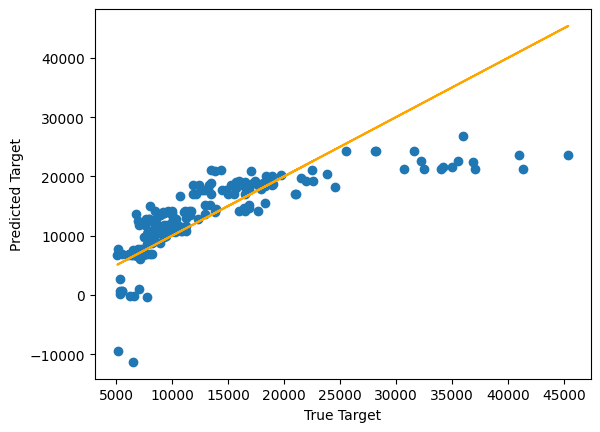

In [148]:
m2_features = X[["city-mpg","peak-rpm","compression-ratio"]]
m2_features["city-mpg"].transform(lambda x: 1/x)
model2 = LinearRegression().fit(m2_features, Y)
visualizeModel(model2,m2_features)

R2: 0.5966056587062648

coefs:
  - city-mpg: -1024.6524022724498
  - peak-rpm: -0.21559655400172772
  - compression-ratio: 661.9304602155516
  - intercept: 33598.98105756758

Like model 1, model 2 was so-so with an $R^2$ of 0.60. For true prices upto around 20000, the model performs relatively well. However, after that, the model doesn't fit the true price well. In general, the model underestimates the true price as seen by the predictions being below the y=x line, meaning that the errors are systematic. I also notice that the shape of true vs predicted price is logarithmic, which causes predicted prices to cap out at around 25000. This may mean that I should've used more transformation on the input features. 

## d) Model 3

R2: 0.7174075238936826
coefs: [(-70.0457428139638, 'city-mpg'), (2.106871719475052, 'peak-rpm'), (12.696169805430301, 'curb-weight')]
intercept: -28208.08264698075


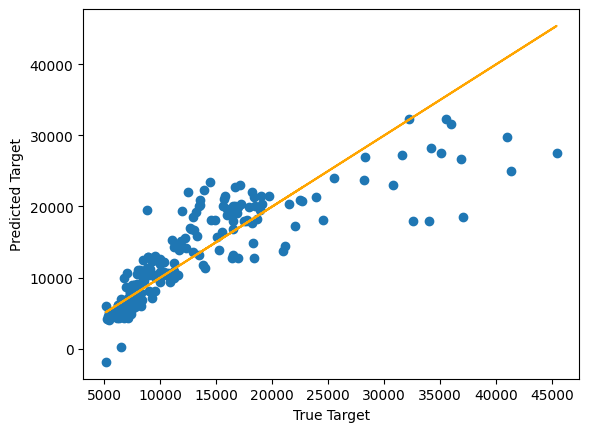

In [149]:
m3_features = X[["city-mpg","peak-rpm","curb-weight"]]
m3_features["city-mpg"].transform(lambda x: 1/x)
m3_features["curb-weight"].transform(lambda x: x**2)
model3 = LinearRegression().fit(m3_features, Y)
visualizeModel(model3,m3_features)

R2: 0.7174075238936826

coefs:
- city-mpg: -70.0457428139638
- peak-rpm: 2.106871719475052
- curb-weight: 12.696169805430301
- intercept: -28208.08264698075

This model was the best of the three having an $R^2$ of 0.72. Although this model had 2 features that were collinear, I think the transformation on peak-rpm added more information that was worth the extra computation. Unlike models 1 and 2, this model fit prices pretty well upto 30000. Additionally, there were less predictions that were negative (something that's impossible) compared to models 1 and 2. However, like models 1 and 2, the model tends to underestimate prices and the shape of the true vs predicted price is logarithimic. 

## e)
Overall, I'd pick model 3. It had the highest $R^2$ by 0.20, and the generated predictions can go beyond 25000, which is a limitation of models 1 and 2. Furthermore, it didn't predict as many negative prices which are impossible in reality.

# $R^2$ 

## a)
The equivalence between the coefficient of determination and the square of the sample correlation does **not** extend to multiple linear regression. In simple linear regression, $R^2$ is equivalent to the squared correlation between the target and feature variable. In multiple linear regression, $R^2$ is equivalent to the squared correlation between the target and predicted target. This difference due to the fact that introducing more features causes residuals to decrease and $R^2$ to increase.
## b)
$R^2$ allows one to quantify the association between many variables, not just a single pair of variables. $r^2$ only allows one to quantify the association between a single pair of variables
